# Time series forcasting of stock market data using ARIMA

In [68]:
# import libarraies

import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import datetime , timedelta
import plotly.express as px
import plotly.graph_objects as go


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [69]:
# define the dates for the data

start = dt.datetime(2023,4,27)
end = dt.datetime.now()

# get the data from yahoo finance

data = yf.download('AAPL',start=start,end=end)

data.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-27,165.190002,168.559998,165.190002,168.410004,167.515854,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,168.779099,55209200
2023-05-01,169.279999,170.449997,168.639999,169.589996,168.689575,52472900
2023-05-02,170.089996,170.350006,167.539993,168.539993,167.645157,48425700
2023-05-03,169.500000,170.919998,167.160004,167.449997,166.560959,65136000


In [70]:
# reset the index and added as first column

data.insert(0,'Date',data.index,True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-27 to 2024-04-26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.8 KB


In [72]:
# removing index 

data.reset_index(drop=True,inplace=True)

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-27,165.190002,168.559998,165.190002,168.410004,167.515854,64902300
1,2023-04-28,168.490005,169.850006,167.880005,169.679993,168.779099,55209200
2,2023-05-01,169.279999,170.449997,168.639999,169.589996,168.689575,52472900
3,2023-05-02,170.089996,170.350006,167.539993,168.539993,167.645157,48425700
4,2023-05-03,169.500000,170.919998,167.160004,167.449997,166.560959,65136000


In [73]:
# plot the data using plotly

fig = go.Figure()

fig.add_trace(go.Scatter(x=data['Date'],y=data['Close'],mode='lines',name='Close Price'))

fig.update_layout(title='Apple Stock Price',xaxis_title='Date',yaxis_title='Price')

fig.show()



c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [74]:
fig = px.line(data,x='Date',y=data.columns,title='Apple Stock Price')

fig.show()

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [75]:
# check the stationarity of the data

def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")

check_stationarity(data['Close'])





ADF Statistic: -2.26121964308795
p-value: 0.18478050065549834
Critical Values:
	1%: -3.456780859712
	5%: -2.8731715065600003
	10%: -2.572968544
Data is non-stationary


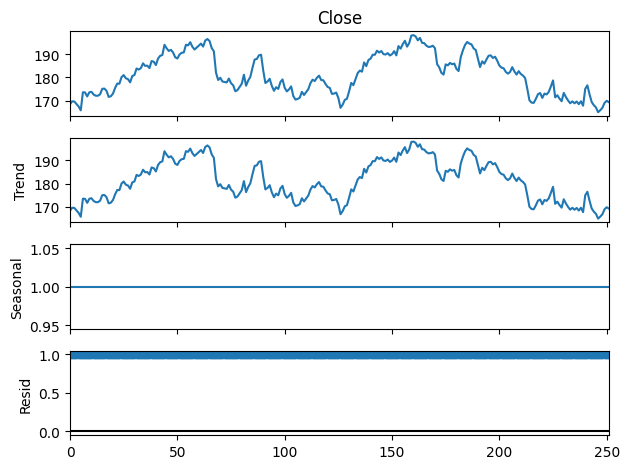

In [76]:
# decompose the data

result = seasonal_decompose(data['Close'],model='multiplicative',period=1)

result.plot()

plt.show()

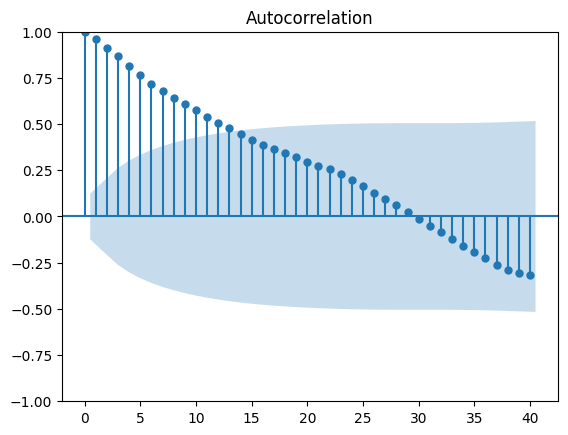

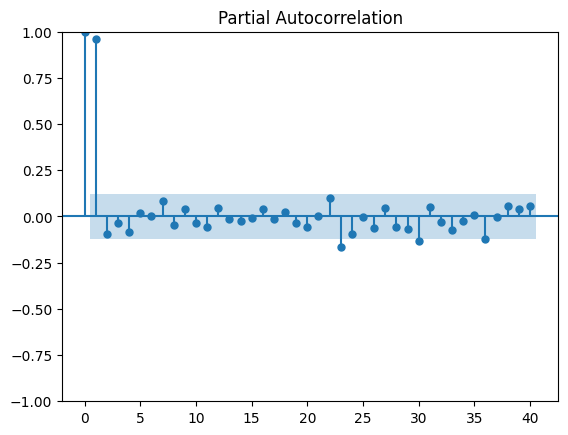

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1121.583, Time=1.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1808.176, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1119.808, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1535.564, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3338.410, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1117.892, Time=0.52 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1119.787, Time=0.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1119.639, Time=0.92 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1118.043, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1121.883, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 4.971 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -554.946
Date:                Sun, 28 Apr 2024   AIC                           1117.892
Time:                        00:06:38   BIC                           1132.010
Sample:                             0   HQIC                          1123.573
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9737      3.104      1.924      0.054      -0.111      12.058
ar.L1          1.0912      0.065     16.785      0.000       0.964       1.219
ar.L2         -0.1246      0.063     -1.968      0.049      -0.249      -0.000
sigma2         4.7354      0.327     14.466      0.000       4.094       5.377
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                43.20
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.26
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
# checking autocorrelation and finding the best p,d,q values

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(data['Close'],lags=40)

plt.show()

plot_pacf(data['Close'],lags=40)

plt.show()

# finding the best p,d,q values

from pmdarima import auto_arima

model = auto_arima(data['Close'],trace=True,seasonal=True,m=1)

model.summary()





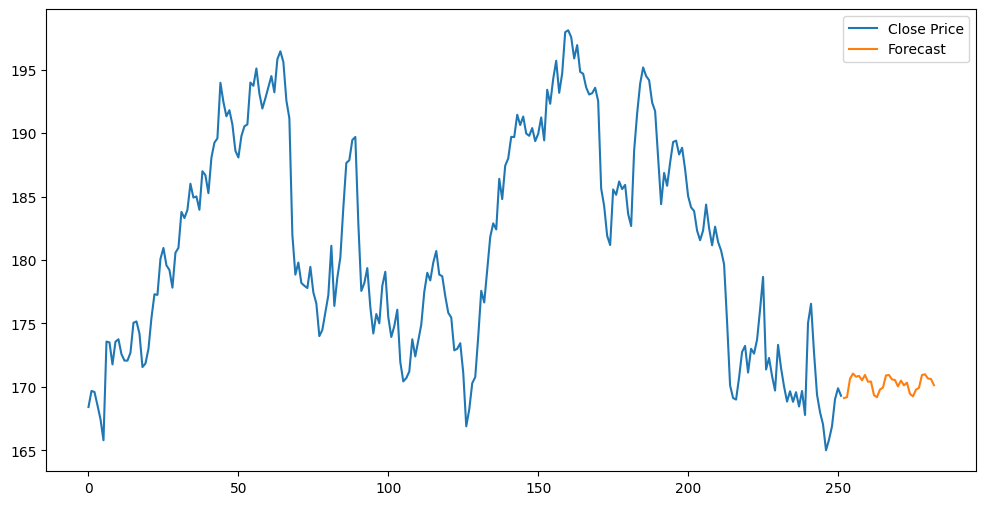

In [86]:
# predicitng the stock price for next 30 days

model = SARIMAX(data['Close'],order=(2,1,2),seasonal_order=(1,1,1,12))

result = model.fit()

forecast = result.predict(len(data['Close']),len(data['Close'])+30,).rename('Forecast')

forecast

# plotting the forecasted data using matplotlib

plt.figure(figsize=(12,6))
plt.plot(data['Close'],label='Close Price')
plt.plot(forecast,label='Forecast')
plt.legend()
plt.show()



